# Klasifikace

Cílem klasifikace je rozdělit prvky (datové body) do předem daných skupin.
Rozlišujeme klasifikaci *binární* (*binary*), kdy rozdělujeme data pouze do dvou tříd, nebo klasifikaci do více tříd (*multiclass*). Ve výše uvedených úlohách každý prvek náleží právě do jedné třídy. Další možností je to, že prvky mohou patřit do více tříd zároveň, v tomto případě se jedná o tzv. *multilabel* úlohu.

Při klasifikaci obvykle třídy číslujeme, máme tedy v případě binární klasifikace na výběr ze dvou možností , obvykle 0,1. V případě *n* tříd jsou to hodnoty $0,1, \ldots, n-1$. Klasifikátor nám vrací jednu z těchto hodnot.
V závislosti na algoritmu nám může též nabízet "pravděpodobnost" k příslušnosti do dané třídy. V případě binární klasifikace nám pro daný prvek stačí jedno číslo, neboť platí zákon vyloučeného třetího (prvek přísluší do třídy 0, nebo 1). V případě více tříd pak máme pravděpodobnost příslušnosti do více tříd.

V závislosti na typu úlohy je třeba volit algoritmy. Pro binární klasifikaci se např. používají:

*   *Logistická regrese* (*Logistic Regression*)
*   Algoritmus K-NN
*   Rozhodovací stromy (*Decision Trees*, DT)
*   Metoda podpůrných vektorů (*Support Vector Machine*, SVM)
*   Naive Bayes

Úlohy klasifikace do více tříd jsou řešitelné buď opakovanou binární klasifikací, nebo speciálními algoritmy, viz dále v tomto sheetu. Podrobnější popis výše uvedených algoritmů bude v samostatných sheetech.

Předpokládejme, že v dalším textu budeme pomocí matice $X$ značit vstupní data pro algoritmus. Jednotlivé řádky jsou datové body a sloupce jsou dimenze příznakového prostoru, např. váha a výška. Předpokládejme, že data jsou již předpřipravená, tj. jedná se opravdu o čísla. Více o přípravě dat v dalším sheetu **Práce s daty a jejich příprava**. Pomocí vektoru $y$ budeme značit vektor labelů. Složky vektor $y$ tak obsahují label  příslušející každému příkladu.  


## Logistická regrese jako binární klasifikátor


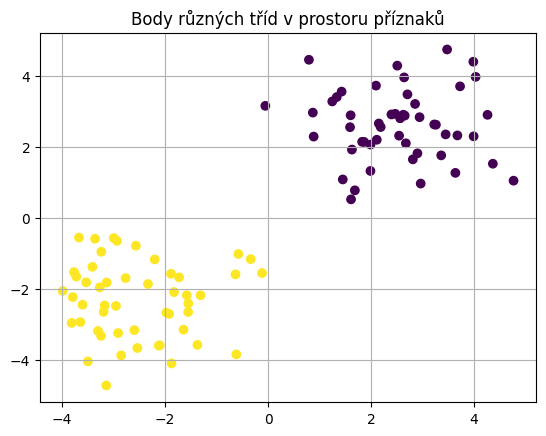

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

Všimněme si, že body takto nagenerované jsou od sebe oddělitelné přímkou (rovinou ve více dimenzích). Pokud tato situace nastane, říkáme, že dané množiny bodů jsou *lineárně separabilní* (oddělitelné).
Pro naši 2D úlohu lineární separovatelnost znamená, že můžeme zkonstruovat takovou rovinu, kde body z jedné množiny jsou nad touto rovinou a body z druhé množiny jsou pod ní.


### Logistická regrese pro klasifikaci

Pokud budeme chtít určit pravděpodobnost příslušnosti do dané třídy, potřebujeme transformovat hodnotu $\hat{y}$ na interval $<0,1>$.
K tomu je možné použít logistickou funkci, tzv. *sigmoidu*, $f(x) = \frac{1}{1+e^{-x}}$. Jejíž průběh je zanesen na obrázku níže.

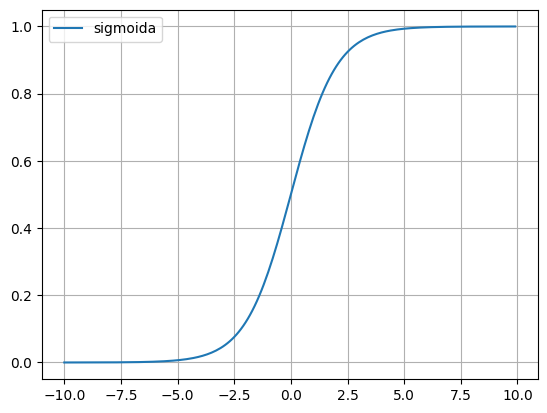

In [ ]:
import numpy as np
xsigmo = np.arange(-10, 10, 0.1)
ysigmo = 1/(1+np.exp(-xsigmo))
plt.plot(xsigmo, ysigmo, label = 'sigmoida')
plt.legend()
plt.grid()



Do sigmoidy dosadíme výsledek součinu $w \cdot x$ a dostáváme pravděpodobnost toho, že prvek patří do třídy s labelem 1:
\begin{equation}
\hat{y} = \frac{1}{1+e^{-w\cdot x}}.
\end{equation}

V následující ukázce kódu přímo používáme hodnoty vah $w$ spočtené z výše uvedené lineární regrese, což je velmi naivní.

V zásadě lze postupovat buď pomocí formulace ve smyslu nejmenších čtverců, což si ukážeme dále, nebo pomocí metody maximální věrohodnosti (*maximal likelihood*), která se používá v praxi. Tuto si ukážeme na samostatném sheetu zaměřeném na lineární modely. V obou případech je nutné používat optimalizační algoritmy pro nalezení vah.

### Logistická regrese pomocí MNČ

Budeme minimalizovat rozdíl mezi predikovanou pravděpodobností příslušnosti ke třídě a skutečnou hodnotou. Minimalizovaná funkce pro formulaci ve smyslu metody nejmenších čtverců je následující:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-X\cdot w }}||^2.
\end{equation}
Poznamenejme, že zde používáme vektorizovanou formulaci, tedy $w$ je vektor, $X$
 matice příkladů a $||u||=\sqrt{\sum_i u_i^2}$ představuje normu daného vektoru.
Pro vlastní minimalizaci kriteriální (*ztrátové*) funkce (*loss function*) je použita knihovna scipy. Mohli bychom též postupovat tak, že bychom si naprogramovali i vlastní optimalizační algoritmus.

*Poznámka*
Často se provádí tzv. *regularizace*, kdy zároveň přidáváme do kriteriální funkce další člen, který má vliv na výslednou velikost vah $w$. Kriteriální funkce pak vypadá následovně:
\begin{equation}
\min_{w} || y-\frac{1}{1+e^{-w\cdot x}}||^2 + c ||w||^2,
\end{equation}
kde číslo $c$ je regularizační parametr.


###Použití scikitlearn
 V knihovně *scikitlearn* je již [logistická regrese](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) naimplementována. Navíc již obsahuje i regularizaci a klasifikaci do více tříd, což si musíme ještě vysvětlit. Krátká ukázka použití je níže.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # zde je možné rovnou předpsat regularizaci
model.fit(X,y)
y_hat = model.predict(X)
print("Porovnani s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
  print(f"{trida_predpoved}-->{realita}|", end="")


Porovnani s realitou:
0-->0|1-->1|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|0-->0|0-->0|0-->0|1-->1|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|1-->1|1-->1|1-->1|1-->1|0-->0|1-->1|1-->1|0-->0|1-->1|0-->0|1-->1|0-->0|0-->0|0-->0|1-->1|0-->0|0-->0|1-->1|0-->0|1-->1|0-->0|

## Klasifikace pomocí metody KNN

Metoda [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (K-Nearest Neighbors) používá pro klasifikaci poměrně jednoduchého principu, kde při klasifikaci určíme *k* nejbližších sousedů a na výsledné určení třídy se použije ta třída, která v nejbližších sousedech převládá, více viz obrázek níže. Detaily si ukážeme v budoucnu. Nyní jen jednoduchý princip naivní implementace algoritmu.

Všimněte si, že data nijak neupravujeme a osy pak mají rozdílné měřítko. Vede to k tomu, že změna např. o 10 jednotek je v různých směrech různě významná.
Pro celou řadu algoritmů je nutné před jejich použitím data upravit tak, aby data měla stejné měřítko např. pomocí *standardizace*, *škálování* viz dále.

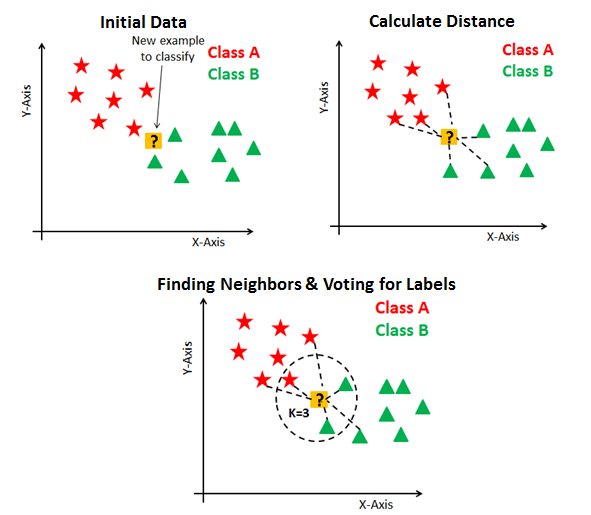

Pro výpočet vzdáeností mezi body jo možné použít třeba následující kód. Výhodou oproti prosté [Pytagorově větě](https://cs.wikipedia.org/wiki/Eukleidovsk%C3%BD_prostor) je to, že nám to rovnou vrací nejbližší bod.

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


###Použití pomocí scikitlearn

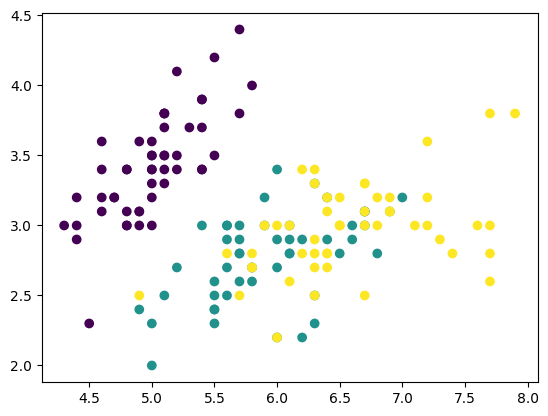

Porovnani s realitou:
0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|0-->0|2-->1|2-->1|2-->1|1-->1|2-->1|1-->1|2-->1|1-->1|2-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|2-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|2-->1|1-->1|2-->1|2-->1|1-->1|2-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|2-->1|2-->1|2-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|1-->1|2-->2|1-->2|2-->2|2-->2|2-->2|2-->2|0-->2|2-->2|2-->2|2-->2|2-->2|2-->2|1-->2|1-->2|1-->2|2-->2|2-->2|2-->2|2-->2|1-->2|2-->2|1-->2|2-->2|2-->2|2-->2|2-->2|2-->2|1-->2|2-->2|2-->2|2-->2|2-->2|2-->2|2-->2|1-->2|2-->2|2-->2|2-->2|1-->2|2-->2|2-->2|2-->2|1-->2|2-->2|2-->2|2-->2|2-->2|2-->2|2-->2|1-->2|

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]] # nacti dataset
X=X.values#preved si tabulku na matici
y = iris.target
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X,y)
y_hat = model.predict(X)
print("Porovnani s realitou:")
for trida_predpoved, realita in zip(y_hat, y):
  print(f"{trida_predpoved}-->{realita}|", end="")

## Rozhodovací stromy

Rozhodovací stromy (Decision tree) jsou algoritmem strojového učení s učitelem vhodným jak pro klasifikaci, tak regresi. Jejich konstrukce spočívá ve vytvoření jednoduchých pravidel, která nám rozdělují příznakový prostor na menší a menší oblasti, tak, že cílová proměnná, daná třída pro klasifikaci, či hodnota predikované veličiny, je v dané oblasti téměř konstantní.

Na obrázku, níže vlevo, je ukázka rozhodovacího stromu pro klasifikaci, např. zda si daný zákazník koupí počítač. Vidíme, že hloubka stromu je dva. Strom není binární, neboť má v první úrovni více větvení. Na druhém obrázku vpravo je ukázána aproximace funkce pomocí rozhodovacího stromu. Tedy je použit rozhodovací strom pro úlohu regrese. Hloubka stromu je opět dva. Všimněte si, že počet hodnot, pomocí kterých je aproximována veličina na ose $y$, je čtyři, což odpovídá binárnímu stromu o hloubce dva.

Klasifikace | Regrese
- | -
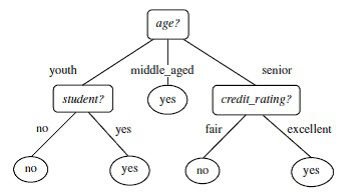|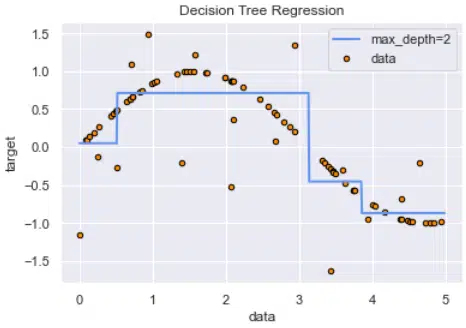
zdroj: https://www.kdnuggets.com/2016/10/decision-trees-concise-technical-overview.html | zdroj: https://www.jcchouinard.com/regression-in-machine-learning/#dt_reg

Jednou ze základních vlastností stromů je, že jsou bezparametrické, vyjma požadované hloubky stromu. Mezi výhody stromů patří to, že mají malé nároky na různé úpravy dat, jako je škálování, či že umí pracovat jak s kategorickými, tak i s numerickými daty. Jsou snadno interpretovatelné,neboť víme na základě jakého pravidla (cesta ve stromu a hodnoty příznaků) došlo k danému rozhodnutí.

Na druhou stranu mají i nevýhody. Příkladem je někdy špatná schopnost generalizace při konstrukci stromů velkých hloubek. Generalizací rozumíme to, že na tréninkových datech algoritmus funguje dobře, ale na testovacích datech (neznámých) má výrazně horší úspěšnost. Tedy model se chová spíše jako paměť a nedošlo ke správnému naučení.
 Díky citlivosti na nevyvážená data, tj. když je výrazný nepoměr mezi počtem zástupců tříd, bývá strom *biasovaný* (ovlivněný) četnějšími třídami. Dále mohou stromy být citlivé na změnu dat, tj. malá změna v trénovacích datech vede ke konstrukci velmi odlišného stromu.

Pro konstrukci stromů je používána celá řada algoritmů:


*   Iterative Dichotomiser 3 - [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)
*   [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm)
*   Classification And Regression Tree - [CART](https://www.researchgate.net/profile/Dan-Steinberg/publication/265031802_Chapter_10_CART_Classification_and_Regression_Trees/links/567dcf8408ae051f9ae493fe/Chapter-10-CART-Classification-and-Regression-Trees.pdf)

Pro praktické použití budeme používat knihovnu [sklearn](https://scikit-learn.org/stable/modules/tree.html)



### Praktická ukázka - klasifikace MNIST

Data set [MNIST](https://en.wikipedia.org/wiki/MNIST_database) je soubor ručně psaných číslic. Cílem je kategorizovat číslice do příslušnách kategorií. Obrázky jsou 28x28 pixelů. Pro naši úlohu použijeme zmenšený dataset v knihovně *sklearn* na 8x8 pixelů.
Vynecháme normování/standardizaci datasetu a použijeme defaultní nastavení algoritmu.

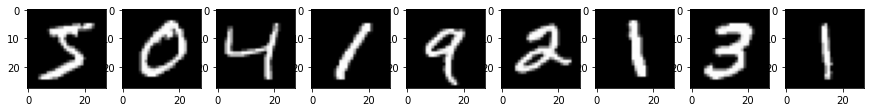

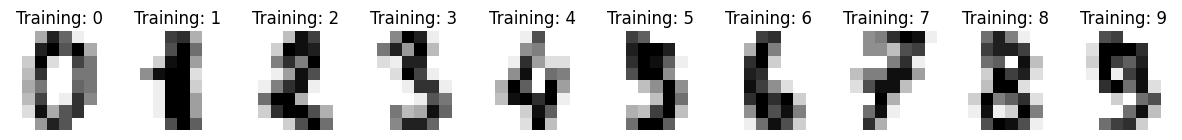

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
# nacteni datasetu
digits = datasets.load_digits()

# prevzato z sklearn - vizualizace cislic
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny, z duvodu reprodukovatelnosti predepiseme nahodny stav - random_state a pri kazdem spusteni to bude stejne
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# zde je nutno doplnit případnou standardizaci, či normalizaci


In [ ]:
# nauceni stromu a provedeni klasifikace na trenovacich datech
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr, y_tr)
predicted = clf.predict(X_tr)
print(f"Report klasifikace na trenovacich datech {clf}:\n{metrics.classification_report(y_tr, predicted)}")

Report klasifikace na trenovacich datech DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [ ]:
predicted = clf.predict(X_test)
print(f"Report klasifikace na testovacich datech {clf}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.79      0.79      0.79        28
           2       0.86      0.76      0.81        33
           3       0.79      0.88      0.83        34
           4       0.77      0.93      0.84        46
           5       0.91      0.91      0.91        47
           6       0.97      0.94      0.96        35
           7       0.85      0.85      0.85        34
           8       0.83      0.67      0.74        30
           9       0.85      0.85      0.85        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



## Seskupování stromů a lesy

Principy zde diskutované je možné použít i pro jiné algoritmy než jsou stromy. Základní myšlenka je *více hlav víc ví*, tedy budeme používat více stromů (hlav). Díky seskupování více klasifikátorů nám nevadí situace, kdy jeden klasifikátor nemusí být zas tak úspěšný, ale jako celek je seskupení klasifikátorů poměrně úspěšné a navíc redukuje přeučování. Poznamenejme, že se nemusí jednat jen o úlohu klasifikace, podobný přístup je možný použít i pro úlohu regrese.

V zásadě rozlišujeme dva algoritmy **bagging** a **boosting**. Oba dva přístupy se často používají, viz např. [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).

## Bagging - Bootstrap Aggregating

V případě baggingu je celý dataset $D$ náhodně rozdělen na menší datasety $D_i$ tak, že $D=\cup_{i}D_i$ a zároveň pro některé dvojice platí $D_i \cap D_j \neq \emptyset$. Na každém z nich je naučen jeden dílčí klasifikátor. Na rozdíl od *boostingu* (viz dále) zde není provázanost jednotlivých klasifikátorů, tedy v principu se mohou učit paralelně. Výsledná klasifikace je dána většinovým hlasováním jednotlivých klasifikátorů. Více viz [zde](https://en.wikipedia.org/wiki/Bootstrap_aggregating). Příkladem jsou tzv. [náhodné lesy](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)(*RandomForest*).

Na ukázce níže je použití algoritmu *RandomForest* pro úlohu MNIST. Je zde vidět, že oproti použití samotného rozhodovacího stromu došlo ke zlepšení ve sledovaných metrikách.

## Boosting
V případě *boostování* spočívá hlavní myšlenka v tom, že se opět náhodně rozdělí původní dataset $D$ na dílčí datasety $D_i$, nyní ovšem k dělení dochází postupně. Nejprve je zkonstruován $D_1$ a je na něm naučen první klasifikátor. Část z příkladů v $D$, které první klasifikátor špatně klasifikuje, je přidána do $D_2$ a je zvýšena jejich důležitost (váhy). Na $D_2$ je naučen druhý klasifikátor. Toto celé se opakuje s předepsaným počtem opakování. Při učení jsou použity tzv. *slabé klasifikátory*, což si můžeme představit jako stromy s malou hloubkou. Síla algoritmu spočívá v tom, že každý další klasifikátor se učí na datech, kde předchozí selhal. O výsledku se rozhoduje váženým součtem dílčích klasifikátorů, kde váha je dána úspěšností klasifikátoru při učení.
Příkladem těchto algoritmů je [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost), nebo [Gradient Tree Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). Tyto a další jsou implementovány v knihovně [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).



In [ ]:
# klasifikace MNIST pomoci RandomForest
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # pro nahodny les

# nacteni datasetu
digits = datasets.load_digits()
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny - trenovaci a testovaci data
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# vytvoreni a nauceni klasifikatoru
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_tr, y_tr)
# predikce a jeji zhodnoceni
predicted = forest.predict(X_test)
print(f"Report klasifikace na testovacich datech {forest}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech RandomForestClassifier(n_estimators=20):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.90      1.00      0.95        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



##Metoda podpůrných vektorů - SVM
Support vector machines (SVM) je jednou z klasických metod strojového učení. Dále rozšiřuje myšlenku lineárních klasifikátorů o pojem hranice. Je použitelná a účinná i pro úlohy, které nejsou lineárně separabilní. V porovnání s neuronovými sítěmi je i méně výpočetně náročná. Ukážeme si základní myšlenky na kterých stojí.

### Formulace
Nejprve předpokládejme, že máme data, která jsou lineárně separabilní. Tedy opět $x_i$ jsou datové body a $y_i$ jsou příslušející labely, $y_i=\pm1$. Na obrázku níže, je zachycena situace, kdy se snažíme separovat jednotlivé body rovinou $w^T\cdot x + b=0$, podobně jako v případě lineárních klasifikátorů. Rozdíl je ovšem ten, že nyní se snažíme maximálně rozšířit pás, ve kterém neleží žádné body v příznakovém prostoru. Body, které leží na hranicích tohoto pásu, nazýváme *podpůrné vektory*, odtud název metody. O hard margin (*pevném okraji*) mluvíme proto, že nepřipouštíme situaci, že by body byly na opačné straně hraničních přímek.


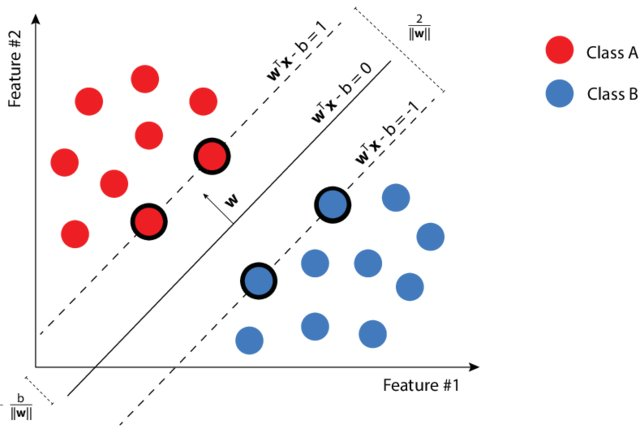

### Jádrová transformace - kernelizace

Již několikrát jsme se setkali s tím, že data v prostoru nižší dimenze nemusí být lineárně separovatelná, ale při vhodné nelineární transformaci $\phi$ do prostoru vyšší dimenze je lze oddělit, viz níže.

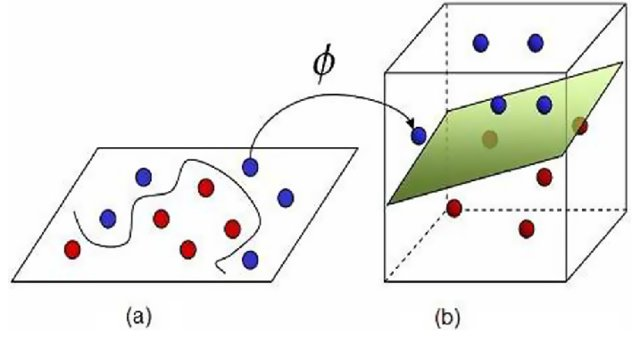

### Příklady jader

Konkrétní příklady jader:


*   *Lineární jádro*: $k(x_i, x_j) = x_i \cdot x_j$ - původní formulace
*   *Polynomiální jádro*: $k(x_i, x_j) = (x_i \cdot x_j +a)^b$
*   *RBF* (Radial Basis Function): $k(x_i, x_j) = e^{-\frac{(||x_i-x_j||^2)}{2\sigma^2}}$
*   *Jádro typu tanh*: $k(x_i, x_j) = \tanh(a x_i \cdot x_j +b)$

Přehled některých jader je podán [zde](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#kernel_methods).





Ukázka použití SVC pomocí sklearn a vliv jader je [zde](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py)

## Naivní Bayesovské klasifikátory

Bayesovký klasifikátor je založen na tzv. *Bayesově větě*, která říká následující:

**Bayesova věta** (základní tvar)

Buď $A$ a $B$ dva náhodné jevy s pravděpodobností $P(A)$ a $P(B)>0$, pak pro podmíněné pravděpodobnosti $P(A \mid B)$ a $P(B \mid A)$ platí následující vztah:
\begin{equation}
P(A \mid B) = \frac{P(B\mid A)\, P(A)}{P(B)}.
\end{equation}

Pro jistotu si připomeňme, že $P(A\mid B)$ značí pravděpodobnost jevu $A$, když jev $B$ nastal. Analogicky $P(B\mid A)$ značí pravděpodobnost jevu $B$, když jev $A$ nastal.

Myšlenka, která je za tím schovaná je celkem jednoduchá, neboť platí:
\begin{align}
P(A \cap B) & = P(A)P(B \mid A), \newline
P(B \cap A) & = P(B)P(A \mid B), \newline
P(A \cap B) & = P(B \cap A) ⇒ P(A)P(B \mid A) = P(B)P(A\mid B),
\end{align}
poslední rovnice je již jinak zapsaná předcházející věta.


V budoucnu se můžete setkat se zápisem Bayesova vzorce ve tvaru:
\begin{equation}
P(H \mid E) = \frac{P(E \mid H)\, P(H)}{P(E)},
\end{equation}
kde
*   *H* značí hypotézu (*hypothesis*), například to, že prvek patří do dané klasifikační třídy.
*   *E* značí evidenci, důkaz (*evidence*) - je určena na základě dat.
*   $P(H)$ - pravděpodobnost hypotézy (tzv. *prior probability*, *prior*) určená nezávisle na datech. Něco, co si myslíme (víme), aniž bychom měli k dispozici data pro evidenci.
*   $P(E)$ - evidence modelu (*model evidence*, *marginal* *likelihood*), šance/pravděpodobnost daná daty
*   $P(E \mid H)$ - pravděpodobnost dat při platnosti hypotézy (*likelihood*)
*   $P(H \mid E)$ - pravděpodobnost hypotézy při daných datech (*posterior probability*, *posterior*).

Základní myšlenka tohoto přístupu je ta, že v klasifikačním procesu máme dopředu nějakou informaci o pravděpodobnosti naší hypotézy např. známe četnost daného jevu v populaci.
Pokud obdržíme data (*evidence*), tak můžeme na základě těchto dat upravit náš odhad (*posterior*).

**Poznámka !!!**

V anglické terminologii se rozlišuje mezi slovem *likelihood* a *probability*. Zde používám pravděpodobnost. Podobně svévolně postupuji i v dalším, kde místo slova relativní četnost, též používám pravděpodobnost.





### Příklad o psovi který stěká, ale nekouše

Za celý svůj život jsem potkal mnoho psů, někteří kousali (bohužel mě) a někteří jen štěkali a někteří obojí. Dejme tomu, že se vedeme databázi všech psů v našem okolí.

In [ ]:
import pandas as pd

data = [['Bobik','N', 'A'], ['Snufik','N','A'], ['Pejska','A','A'],['Bobina','N','A'],['Ringo','A','A'],['Fík','N','A'],['Olaf','A','N'],['Ben','N','A'],['Vilik','N','N'],['Lump','A','N']]
df = pd.DataFrame(data, columns = ['Jmeno', 'Kouse', 'Steka'])
df.set_index('Jmeno', inplace = True)
df

,Kouse,Steka
Jmeno,,
Bobik,N,A
Snufik,N,A
Pejska,A,A
Bobina,N,A
Ringo,A,A
Fík,N,A
Olaf,A,N
Ben,N,A
Vilik,N,N


Chtěl bych navrhnout nějaký rozhodovací algoritmus, který mi na základě toho, zda pes štěká či neštěká pomůže určit, zda mi hrozí nějaké riziko.   

Pro názornější značení budeme používat $\#Psi$ pro počet psů v tabulce a pro počet kousajících psů značení $\#(Kouse == N)$, ostatní analogicky.

Hypotéza je taková, že si myslím, že (mne) pes nekousne, $H=nekousne$. Pravděpodobnost hypotézy je $P(nekousne)=\frac{\#(Kouse == N)}{\#Psi}$, níže je to spočteno na základě dostupných dat. Vidíme, že $60\%$ psů nekouše a zbývajících $40\%$ kouše. Ukážeme si, že dodáním informace o tom, zda pes štěká, zlepšíme odhad rizika pokousání.

Když vezmeme jako fakt (evidence), to, že pes štěká, tak $P(steka)=\frac{\#(Steka == A)}{\#Psi}$, podobně pravděpodobnost pro neštěkajícího psa určená na základě dat je $P(nesteka)=\frac{\#(Steka == N)}{\#Psi}$

Pravděpodobnost, že pes štěká a zároveň nekouše, je spočtena z dat následovně:
\begin{equation}
P( steka \mid nekouse) = \frac{\#(Kouse == N\,\wedge\, Steka == A )}{\#(Kouse == N)},
\end{equation}
 tedy vybírám z množiny všech nekousajících psů.

Pravděpodobnost toho, že pes který stěká, mne nekousne, je dána Bayesovským vzorcem:
\begin{equation}
P( nekouse \mid steka) = \frac{P( steka \mid nekouse) P(nekouse)}{P(steka)} \approx 71\%.
\end{equation}

Podobně pravděpodobnost, že mne pes nekousne, když neštěká je dána:
\begin{equation}
P( nekouse \mid nesteka) = \frac{P( nesteka \mid nekouse) P(nekouse)}{P(nesteka)}\approx 33\%.
\end{equation}

Vidíme, že informace o tom, že pes štěká nám pomohla odhadnout, že riziko pokousání je menší. A obráceně, když pes neštěká, tak je riziko větší.



In [ ]:
pocet = len(df)# pocet prvku v tabulce #Psi
# vytvoření si dílčích množin
kouse = df[ df['Kouse'] == 'A'] # filtruj jen ty co kousaji
nekouse = df[df['Kouse'] == 'N'] # filtruj jen ty co nekousaji
steka = df[df['Steka'] == 'A']
nesteka = df[df['Steka'] == 'N']
# vytvoření podmnožin z množin
steka_z_nekouse = nekouse[nekouse['Steka'] == 'A'] # z mnoziny nekousajicich vybiram stekajici
nesteka_z_nekouse = nekouse[nekouse['Steka'] == 'N'] # z mnoziny nekousajicich vybiram nestekajici

# výpočty pravděpodobnosí
P_kouse = len(kouse)/pocet
P_nekouse = len(nekouse)/pocet
P_steka = len(steka)/pocet
P_nesteka = len(nesteka)/pocet
P_steka_nekouse = len(steka_z_nekouse)/len(nekouse)
P_nesteka_nekouse = len(nesteka_z_nekouse)/len(nekouse)
print(f"P(kouse) = {P_kouse}")
print(f"P(nekouse) = {P_nekouse}")
print(f"P(steka) = {P_steka}")
print(f"P(nesteka) = {P_nesteka}")
print(f"P(steka|nekouse) = {P_steka_nekouse}")
print(f"P(nesteka|nekouse) = {P_nesteka_nekouse}")
print('--'*50)

#vypocet pomoci Bayesvých vzorců
P_nekouse_steka = P_steka_nekouse*P_nekouse/P_steka
P_nekouse_nesteka = P_nesteka_nekouse*P_nekouse/P_nesteka

print(f"P(nekouse|steka) = {P_nekouse_steka}")
print(f"P(nekouse|nesteka) = {P_nekouse_nesteka}")

P(kouse) = 0.4
P(nekouse) = 0.6
P(steka) = 0.7
P(nesteka) = 0.3
P(steka|nekouse) = 0.8333333333333334
P(nesteka|nekouse) = 0.16666666666666666
----------------------------------------------------------------------------------------------------
P(nekouse|steka) = 0.7142857142857143
P(nekouse|nesteka) = 0.3333333333333333


#### Jiný pohled

Udělejme si nejprve kontingenční tabulku (viz níže). Celkový počet psů je 10. Lze vidět, že  v prvním řádku jsou celkem 2+2=4 kousající psi  a tedy nekousajících je 6=5+1. Podobně v prvním sloupci jsou 2+5=7 štěkajících psů a tedy neštěkajících je 3=2+1.

*   Průnik *A-A* je počet kousajících a zároveň štěkajících psů.
*   Průnik *A-N* je počet kousajících a zároveň neštěkajících psů.
*   Průnik *N-A* je počet nekousajících a zároveň štěkajících psů.
*   Průnik *N-N* je počet nekousajících a zároveň neštěkajících psů.


$P( nekouse \mid steka)=\frac{5}{7} \approx 71\%$

$P( nekouse \mid nesteka)=\frac{1}{3} \approx 33\%$

$P( kouse \mid steka)=\frac{2}{7} \approx 29\%$

$P( kouse \mid nesteka)=\frac{2}{3} \approx 67\%$


Vidíme, že dostáváme to samé jako výše. Použití takovéto tabulky je ostatně základ pro odvození výše uvedené Bayesovy věty.

In [ ]:
pd.crosstab(df['Kouse'],df['Steka'])


Steka,A,N
Kouse,,
A,2,2
N,5,1


### Bayesova věta pro pokročilejší

V případě, že může nastávat více vzájemně nezávislých jevů $A_1,A_2,\ldots, A_n$ a $B$ je jev s $P(B)>0$, tak můžeme psát:
\begin{equation}
P(A_i \mid B) = \frac{P(B\mid A_i)P(A_i)}{\, \sum_{j=1}^{n}P(B \mid A_j)P(A_j)},
\end{equation}
kde jsme rozepsali pravděpodobnost $P(B)$ z jednodušší formy Bayesova vzorce.
Toto lze přepsat do tvaru:
\begin{equation}
P(A \mid B) = \frac{P(B\mid A)\, P(A)}{P(B \mid A)P(A)+P(B \mid A^c) P(A^c)}.
\end{equation}

Zde si ještě uvědomme, že jmenovatel $P(B \mid A)P(A)+P(B \mid A^c) P(A^c)$ představuje celkovou $P(B)$.



### Naivní Bayesovský klasifikátor

Předpokládejme, že máme k dispozici dataset, který obsahuje $n$ záznamů (datových bodů), kde každý záznam patří do jedné z $c$ tříd. Dimenze příznakového prostoru je $m$. Máme tedy $n$ vektorů $x_i=(x_{i}^1,x_{i}^2,\ldots,x_{i}^m),\, i=1,\ldots,n$ a každému máme přiřazen label $y_i\in\{1,2,\ldots,c\}$.

Chceme-li určit pravděpodobnost, že prvek $x_{*}=(x_{*}^1,x_{*}^2,\ldots,x_{*}^m)$ patří do třídy $y_j$, tak použitím výše uvedeného Bayesova vzorce dostáváme:
\begin{equation}
P(y_j \mid x_{*})=\frac{P(x_{*} \mid y_j)P(y_j)}{P(x_{*})} = \frac{P(x^{1}=x_{*}^{1}\mid y_j) P(x^{2}=x_{*}^{2}\mid y_j)\ldots P(x^{m}=x_{*}^{m}\mid y_j)\, P(y_j)}{P(x_{*})} = \frac{∏_{k=1}^{m}P(x^{k}=x_{*}^{k}\mid y_j)\, P(y_j)}{P(x_{*})}.
\end{equation}

Zde jmenovatel $P(x_{*})$ představuje normovací konstantu, kterou v podstatě ani nepotřebujeme, neboť je pro všechny třídy stejná, viz dále. Jako třídu $ y_j $ příslušející danému $ x_{*}$ beremu tu, která má největší pravděpodobnost.


Naivita klasifikátoru se projevuje v tom, že bereme jednotlivé jevy jako vzájemně nezávislé a přiřazujeme jim pravděpodobnost  $P(x^{k}=x_{*}^{k}\mid y_j)$, což reálně nemusí být pravda.


#### Ilustrační příklad - Bayesovský klasifikátor

Předpokládejme, že chceme vyhodnocovat, zda nám hrozí nebezpečí od nějakého člověka, na základě toho, jak je velký (např. velikost trika), jak je oblečený (barva trika) a to zda má zbraň. Sesbíraná data jsou dána následující tabulkou.

In [ ]:
velikost = ['M','L','L','XL','XL','S','XS','S','XL','M']
zbran = [0,1.0,0,1,1,0,0,0,1,0]
barva_obleceni = ['RED','BLACK','BLUE','BLACK','RED','BLACK','RED','BLUE','BLACK','BLACK']
nebezpeci = [1,1,0,1,0,1,0,0,1,0]

data = pd.DataFrame(data = {'velikost':velikost,'zbran':zbran,'triko':barva_obleceni,'nebezpeci':nebezpeci})
data.head(10)

,velikost,zbran,triko,nebezpeci
0,M,0,RED,1
1,L,1,BLACK,1
2,L,0,BLUE,0
3,XL,1,BLACK,1
4,XL,1,RED,0
5,S,0,BLACK,1
6,XS,0,RED,0
7,S,0,BLUE,0
8,XL,1,BLACK,1
9,M,0,BLACK,0


Bude nás zajímat pravděpodobnost příslušnosti do tříd 0/1 ve sloupci nebezpečí,  když $x_{*}= (L,1,BLACK)$.

Použitím výše uvedeného Bayesova vzorce dostáváme pro přiřazení do třídy $nebezpeci=1$:
\begin{align}
P(nebezpeci=1\mid x^{*}) = \frac{P(velikost=L\mid nebezpeci=1) P(zbran=1\mid nebezpeci=1) P(triko=BLACK \mid nebezpeci=1) P(nebezpeci=1)}{P(x^*)},
\end{align}
a pro pravděpodobnost přiřazení do třídy $nebezpeci=0$:
\begin{align}
P(nebezpeci=0\mid x^{*}) = \frac{P(velikost=L\mid nebezpeci=0) P(zbran=1\mid nebezpeci=0) P(triko=BLACK \mid nebezpeci=0) P(nebezpeci=0)}{P(x^*)}.
\end{align}

Příslušné pravděpodobnosti pro $nebezpeci=1$ jsou dány:
\begin{align}
 P(nebezpeci=1)=\frac{5}{10}=\frac{1}{2}\\
P(velikost=L\mid nebezpeci=1)=\frac{1}{5}\\
P(zbran=1\mid nebezpeci=1)=\frac{1}{5}\\
P(triko=BLACK \mid nebezpeci=1)=\frac{4}{5}
\end{align}
a výsledná pravděpodobnost pro $nebezpeci=1$:
\begin{equation}
P(nebezpeci=1\mid x^{*})=\frac{\frac{1}{5}\frac{3}{5}\frac{4}{5}\frac{1}{2}}{P(x^*)}=\frac{0.048}{P(x^*)}.
\end{equation}

Obdobně pro $nebezpeci=0$ jsou pravděpodobnosti:
\begin{align}
 P(nebezpeci=0)=\frac{5}{10}=\frac{1}{2}\\
P(velikost=L\mid nebezpeci=0)=\frac{1}{5}\\
P(zbran=1\mid nebezpeci=0)=\frac{1}{5}\\
P(triko=BLACK \mid nebezpeci=0)=\frac{1}{5}
\end{align}
a výsledná pravděpodobnost pro $nebezpeci=0$:
\begin{equation}
P(nebezpeci=0\mid x^{*})=\frac{\frac{1}{5}\frac{1}{5}\frac{1}{5}\frac{1}{2}}{P(x^*)}=\frac{0.004}{P(x^*)}.
\end{equation}  

Je vidět, že ačkoliv neznáme $P(x^*)$, tak můžeme říci, že třída $nebezpeci=0$ má vyšší pravděpodobnost.

Dále můžeme využít toho, že součet pravděpodobností $P(nebezpeci=1\mid x^{*})+P(nebezpeci=0\mid x^{*})=1$, sečteme-li příslušné rovnice výše dostáváme
\begin{equation}
1 = P(nebezpeci=1\mid x^{*})+P(nebezpeci=0\mid x^{*})=\frac{0.048}{P(x^*)}+\frac{0.004}{P(x^*)},
\end{equation}
neboli $P(x^*)=0.048+0.004=0.052$ a pak vidíme:

\begin{align}
P(nebezpeci=1\mid x^{*})=\frac{0.048}{0.052}≈0.923\\
P(nebezpeci=0\mid x^{*})=\frac{0.004}{0.052}≈0.077
\end{align}  

### Použití scikitlearn

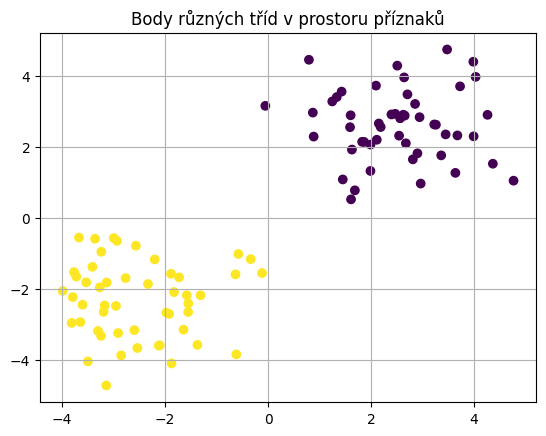

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

[0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 1 0]
Matice zamen pomoci sklearn:
50|0
0|50


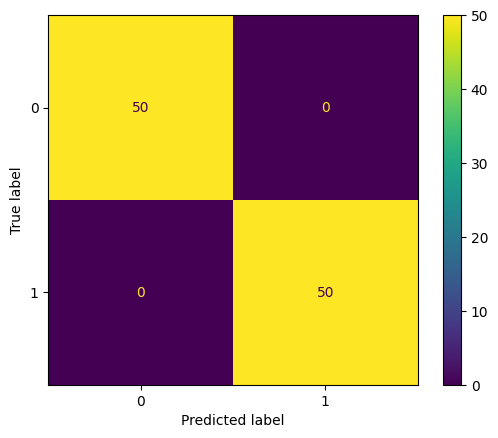

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(y_pred)

#zhodnocení klasifikace pomocí sklearn
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
cm = confusion_matrix(y,y_hat)
tn, fp, fn, tp = cm.ravel()
print(f"Matice zamen pomoci sklearn:")
print(f"{tp}|{fp}")
print(f"{fn}|{tn}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])# vykresleni
disp.plot()

## Ohodnocení binární klasifikace

V dalším si opět nejprve nagenerujeme body, nyní ovšem tak, že nepůjdou lineárně oddělit. Musí tedy nastat situace, že některé z bodů patřících do třídy 1 budou klasifikovány tak, že patří do třídy 0 a obráceně.


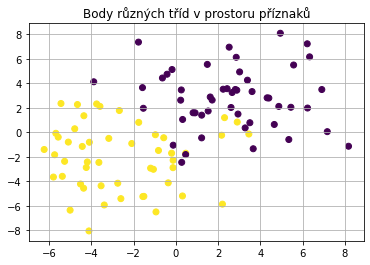

In [ ]:
# generování bodů
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], cluster_std=2.5, n_features=2, random_state=0)

plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()


Chceme-li měřit jak klasifikátor funguje, tak potřebujeme znát počty správně a špatně klasifikovaných případů. Toto nám elegantně vyjadřuje tzv.  [matice záměn](https://cs.wikipedia.org/wiki/Matice_z%C3%A1m%C4%9Bn)(*confusion matrix*). Zde upozorňujeme na to, že různé zdroje uvádějí různé tvary této matice, nejčastěji bývá diagonálně otočená, případně dochází k přehození sloupců.

<table>
  <tr>
   <th> </th>
    <th colspan="3">Realita</th>
  </tr>
  <tr>
  <th rowspan="4">Klasifikátor</th>
  </tr>
  <tr>
   <td> </td>
    <th>Pozitivní (1)</th>
    <th>Negativní (0)</th>
  </tr>
  <tr>
    <th>Pozitivní (1)</th>
    <td> TP </td>
    <td> FP </td>
  </tr>
  <tr>
    <th>Negativní (0)</th>
    <td> FN </td>
    <td> TN </td>
  </tr>
</table>


*   TP - počet pozitivních, které klasifikátor správně označil (*True Positive*)
*   TN - počet negativních, které klasifikátor správně označil (*True Negative*)
*   FP - reálně jde o negativní, ale klasifikátor je označil jako pozitivní (*False Positive*)
*   FN - reálně jde o pozitivní, ale klasifikátor je označil jako negativní (*False Negative*)

Optimální je mít prvky pouze na diagonále. Ukažme si nejprve vlastní implementaci a poté pomocí knihovny  [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), která má pro to přímo metodu:
```
confusion_matrix(y_true, y_pred)
```

Poznamenejme, že matice vracená pomocí této metody má následující intepretaci. Na pozici s indexy $i$, $j$ je počet prvků, které reálně patří do třídy s indexem $i$, ale klasifikátor je přiřadil do třídy $j$. Tedy na pozici $0,0$ nalezneme *TN*, na pozici $1,1$ nalezneme *TP*, na pozici $1,0$ je $FN$ atd.


### Metriky

Uveďme si zde některé metriky pro zhodnocení klasifikace a jejich význam. Pomocí $P$ značíme celkový počet pozitivních (třída 1) a pomocí $N$ celkový počet negativních (třída 0).
Platí $P = TP + FN$, tedy $P$ je dáno součtem v prvním sloupci matice záměn. Obdobně $N = TN + FP$, tedy součet druhého sloupce matice záměn.


**Senzitivita** (*True Positive Rate*, *recall*)
udává poměr, kolik z celkového počtu pozitivních je pomocí klasifikátoru správně označeno jako pozitivní.
\begin{equation}
TPR = \frac{TP}{P}=\frac{TP}{TP+FN}.
\end{equation}

**Specificita** (*True Negative Rate*)
udává poměr, kolik z celkového počtu negativních je pomocí klasifikátoru správně označeno jako negativní
\begin{equation}
TNR = \frac{TN}{N} = \frac{TN}{TN+FP}.
\end{equation}

Uvědomme si jejich význam. Předpokládejme, že máme klasifikátor, který bude určovat, zda je někdo infikován (positivní test = třída 1, negativní test = třída 0).
Sensitivita nám říká, jaké procento ze skutečně pozitivních je tímto testem odhaleno, a specificita říká, jaké procento ze skutečně negativních tento test označí jako negativní.
V případě, že uděláme test takový, který vše označí jako pozitivní (FN =0, TN=0), tak je jeho senzitivita rovna 100%, ale bohužel specificita je nulová. Obráceně test, který všechny označí jako zdravé (negativní) (TP=0, FP=0) má sensitivitu nulovou a specificitu 100%.

Dále můžeme zavést tzv. **False Positive Rate**
\begin{equation}
FPR = \frac{FP}{N} = 1 - TNR,
\end{equation}
který představuje jaká část z negativních je klasifikátorem označena jako pozitivní.

Další metrikou je **přesnost** (*accuracy*), která udává celkový poměr počtu správně určených tříd:
\begin{equation}
ACC = \frac{TP+TN}{P+N}.
\end{equation}

Pomocí  **prediktivní hodnoty pozitivního testu** (*precision*, *Positive Predictive Value*) se určuje, jaký poměr z pozitivně označených hodnot tvoří správně určené (pozitivní) hodnoty, tj. jaká je pravděpodobnost, že test je skutečně pozitivní, když vyšel pozitivně:
\begin{equation}
PPV = \frac{TP}{TP+FP}.
\end{equation}

Pokud by daný klasifikátor měřil výskyt daného jevu např. v populaci, tak je pro nás důležitá tzv. **prevalence** (srovnej s pojmem *prior* výše):
\begin{equation}
Prevalence = \frac{P}{P+N}.
\end{equation}


# Klasifikace do více tříd
V daším uvažujme, že máme $n>2$ tříd, tedy nejedná se o binární klasifikaci. V tomto případě musíme rozlišovat, jaký klasifikátor používáme. Některé klasifikátory, např. *Naivní Bayesovský klasifikátor*, či *KNN* je možné jednoduše použít přímo. V případě algoritmů binární klasifikace, musíme sestrojit několik binárních klasifikátorů a na základě jejich rozhodnutí pak vybrat příslušnost k dané třídě.


V zásadě se používají [dvě strategie](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/):

*    *O-V-R* (One Versus Rest), či *O-V-A* (One Versus All) - v tomto případě dojde k sestrojení $n$ klasifikátorů a to tak, že každý dílčí klasifikátor určuje příslušnost do jedné z $n$ tříd. Výsledná třída je taková, která je předpověděna s největší jistotou. Musíme tedy být schopni měřit jistotu příslušnosti k dané třídě, viz např. *logistická regrese* zde a v **sheetu lineární klasifikátory**. Metoda je implementována v knihovně [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier).
*   *O-V-O* (One Versus One) - zde dojde k sestrojení klasifikátorů pro každou dvojici tříd, tedy dojde k sestrojení k $\frac{n(n-1)}{2}$ dílčích klasifikátorů. Vybrána je ta třída, která je určena s největší jistotou. Na rozdíl od *O-V-R* je pomalejší, protože je nutné naučit větší počet klasifikátorů. Na druhou stranu se obvykle používá pro metody, které mohou mít problémy s velkými datasety, např. metoda *SVM*, viz **sheet metoda SVM**. Zde se potom pro každý dílčí klasifikátor používá jen část z celkového datasetu, viz [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html). Detailní popis algoritmu je možné nalézt [zde](https://www.sciencedirect.com/science/article/pii/S002002551631043X#sec0013).



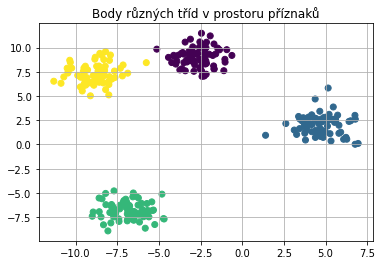

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# generování bodů
X, y = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
plt.scatter(X[:,0],X[:,1], c = y)
plt.grid()
plt.title("Body různých tříd v prostoru příznaků")
plt.show()

#Literatura

1)   Nenáročný úvod do problematiky strojového učení se zaměřením na klasifikaci je [zde](https://developers.google.com/machine-learning/crash-course/classification/video-lecture).

2)  Dalším užitečným zdrojem úvodních informací je [blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

3)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.

